In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = "/content/drive/MyDrive/ScienceFair"

low_path = f"{base_path}/lowimages"
mid_path = f"{base_path}/midimages"
high_path = f"{base_path}/highimages"
test_path = f"{base_path}/test"

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

low_ds = tf.keras.preprocessing.image_dataset_from_directory(
    low_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

mid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    mid_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

high_ds = tf.keras.preprocessing.image_dataset_from_directory(
    high_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=1,  # 1 so we can track time per image
    shuffle=False
)

Found 10 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 999 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(16, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2)  # 2 classes: Apple, Banana
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model

In [ ]:
model_low = build_model()
history_low = model_low.fit(low_ds, epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6630
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step - accuracy: 0.9000 - loss: 0.2176
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7000 - loss: 0.5263
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7000 - loss: 1.1521
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9000 - loss: 0.3520
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0185
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9000 - loss: 0.1940
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9000 - loss: 0.1055
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0073
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 1.0000 - loss: 0.0116
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0224
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0133


In [ ]:
model_mid = build_model()
history_mid = model_mid.fit(mid_ds, epochs=15)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.5365 - loss: 1.6696
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5346 - loss: 0.7195
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7318 - loss: 0.5393
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8605 - loss: 0.4187
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8977 - loss: 0.3123
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8205 - loss: 0.3494
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9296 - loss: 0.1872
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8829 - loss: 0.2432
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.9324 - loss: 0.1607
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9691 - loss: 0.1282
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9785 - loss: 0.1012
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9691 - loss: 0.1

In [ ]:
model_high = build_model()
history_high = model_high.fit(high_ds, epochs=15)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.6539 - loss: 1.1049
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8802 - loss: 0.3226
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9234 - loss: 0.1884 
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9630 - loss: 0.1151
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.9836 - loss: 0.0680
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9864 - loss: 0.0342
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9938 - loss: 0.0310
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9962 - loss: 0.0170
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9803 - loss: 0.0578
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9933 - loss: 0.0339
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9644 - loss: 0.0973
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - acc

Found 40 files belonging to 2 classes.
Low Model Predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


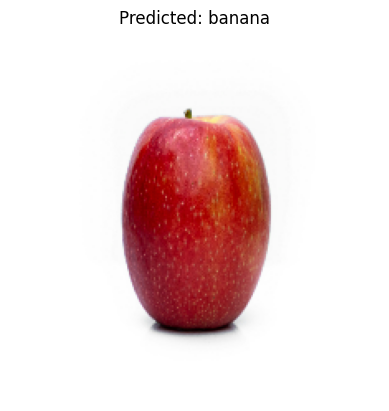

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


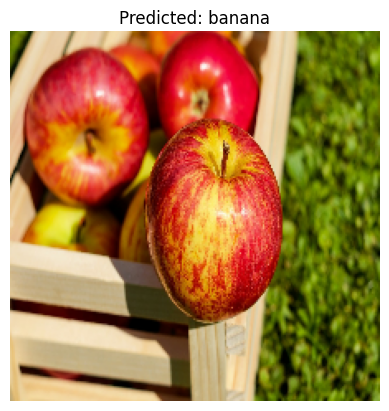

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


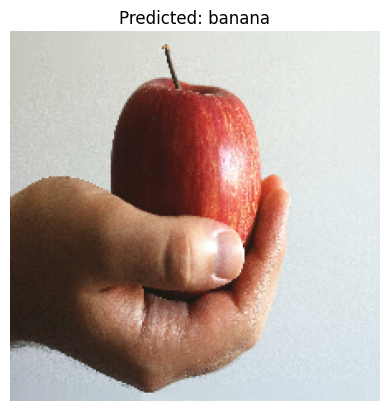

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


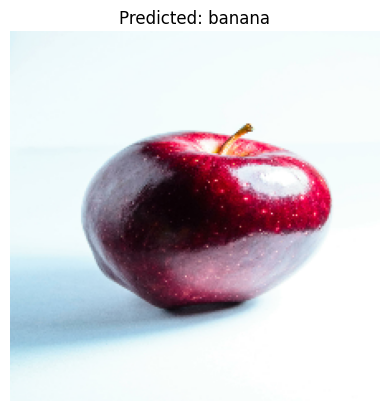

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


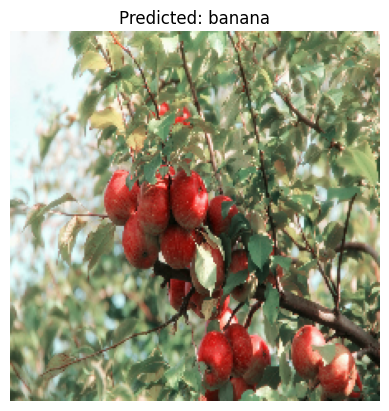

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


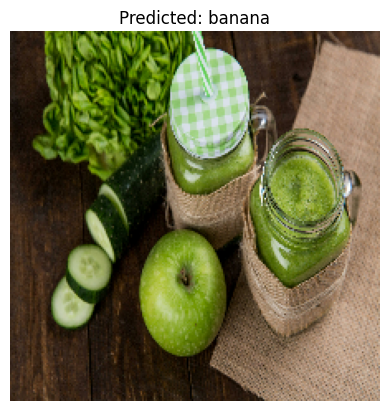

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


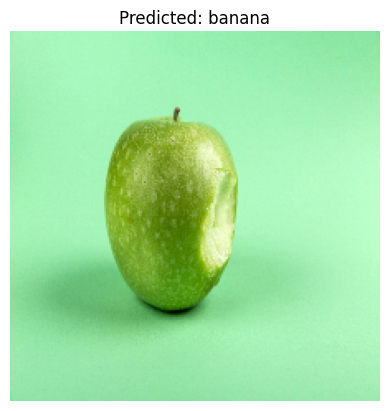

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


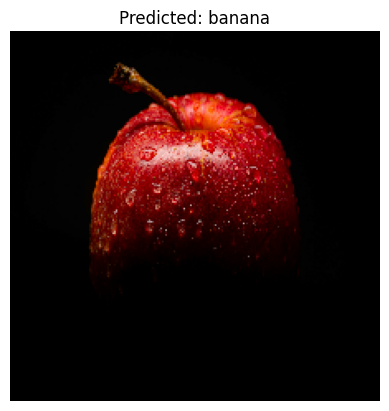

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


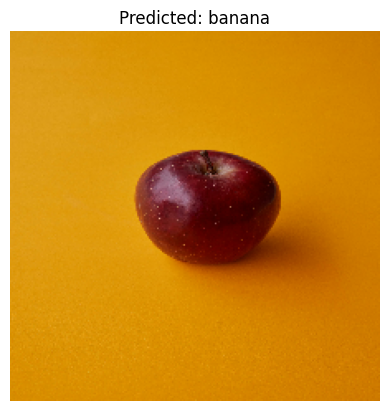

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


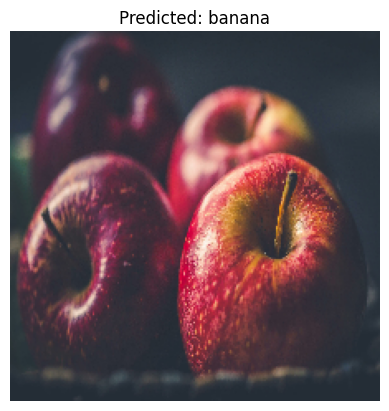

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


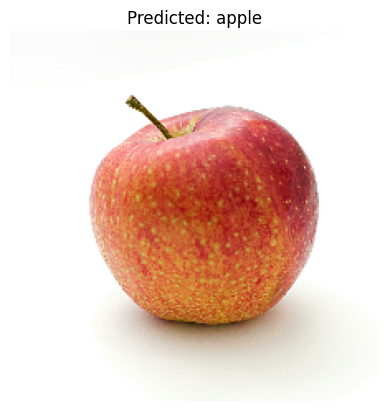

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


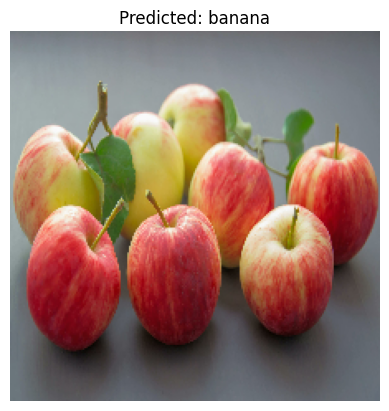

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


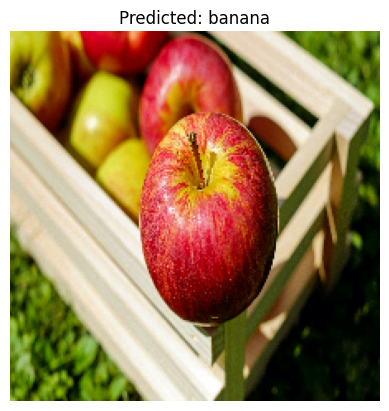

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


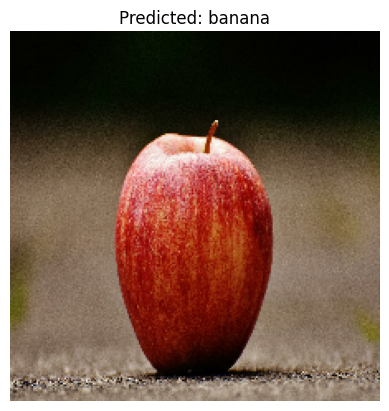

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


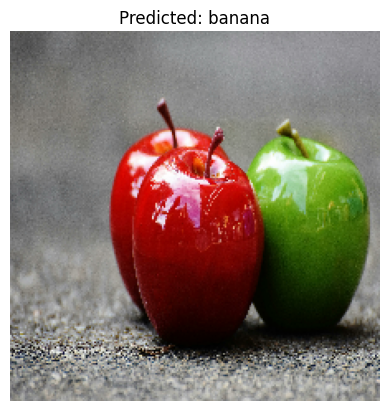

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


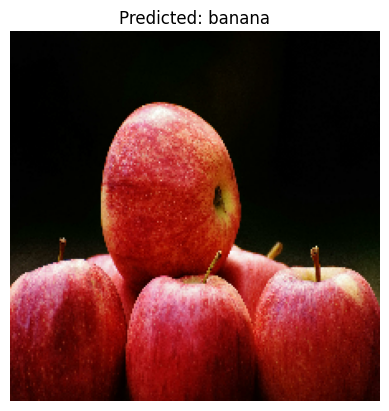

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


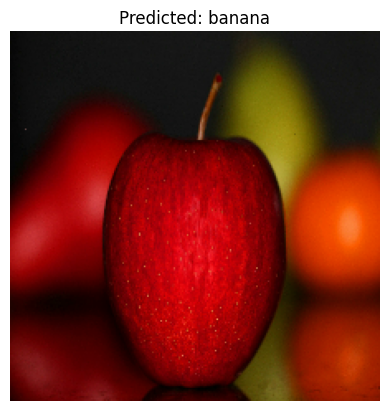

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


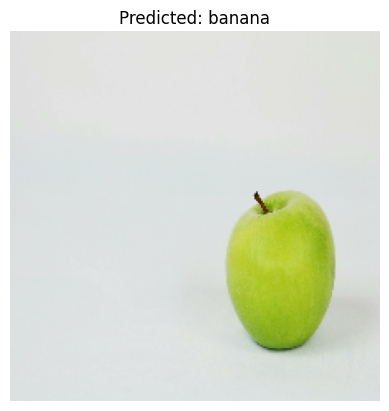

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


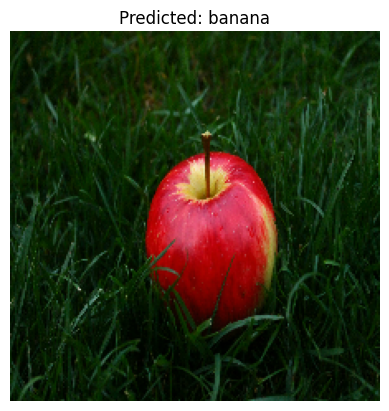

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


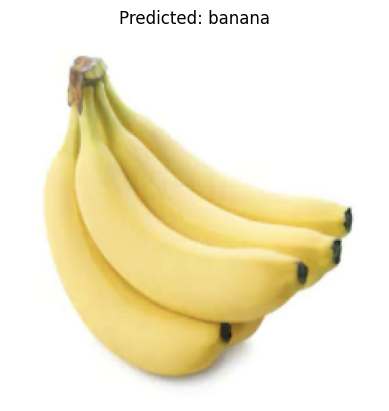

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


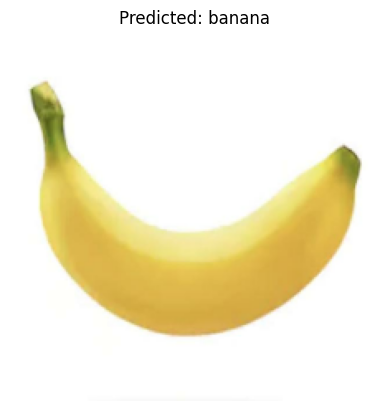

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


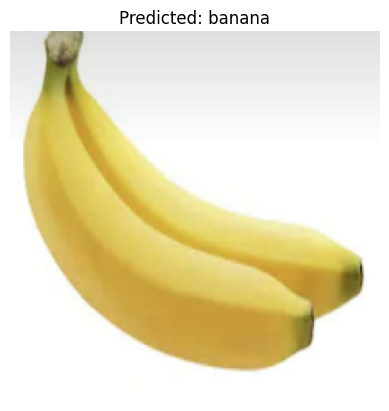

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


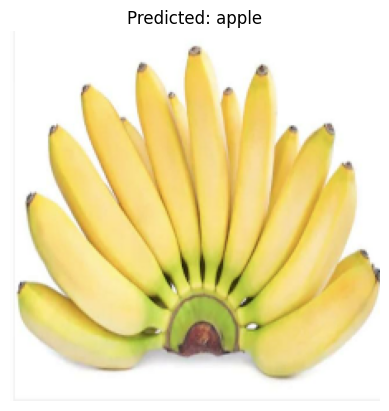

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


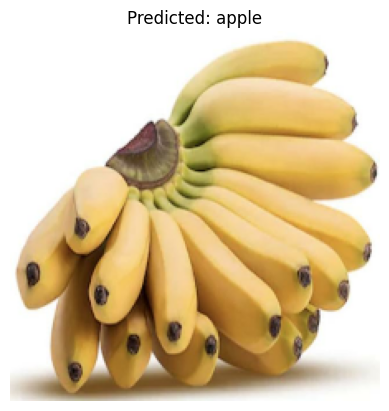

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


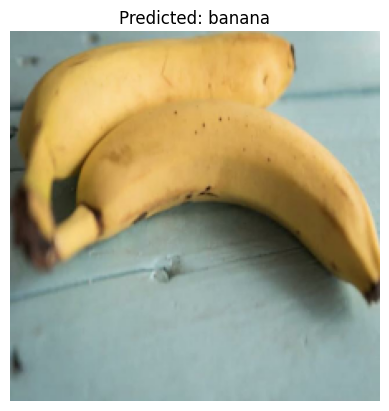

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


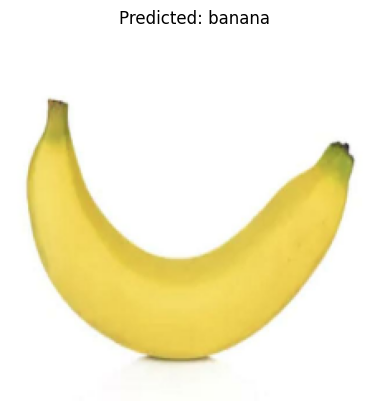

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


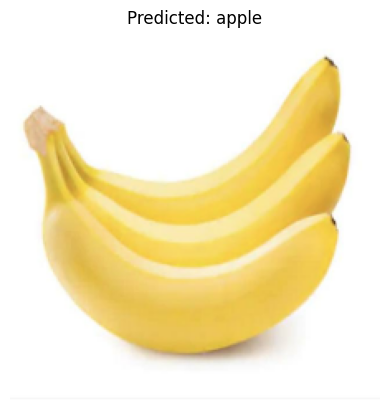

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


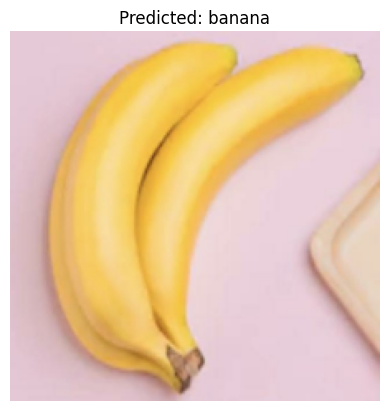

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


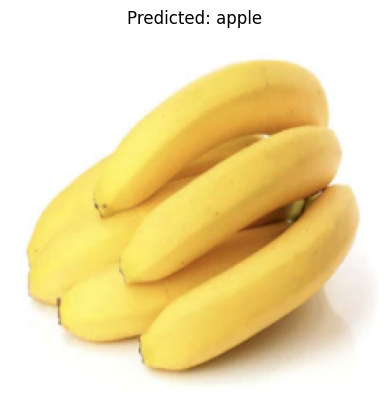

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


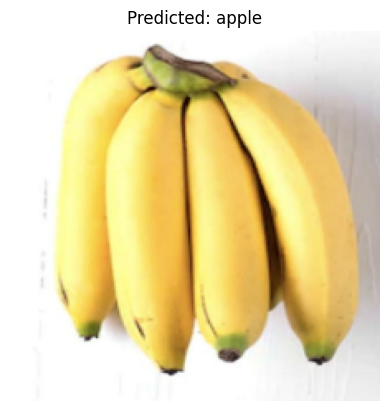

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


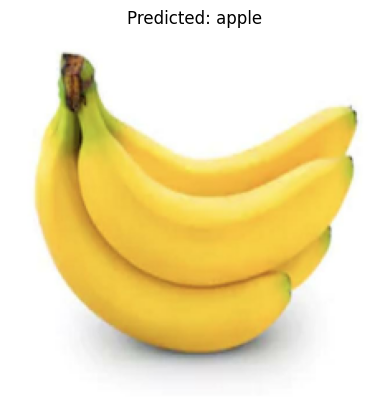

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


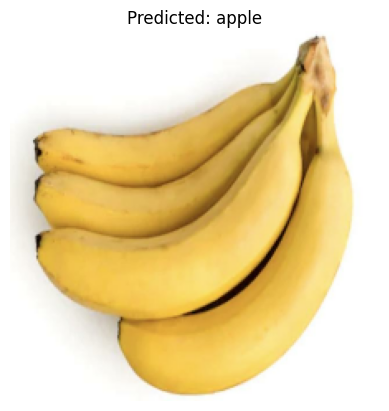

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


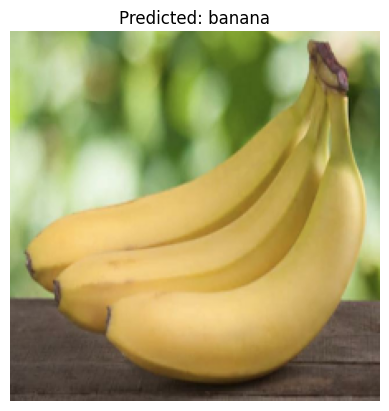

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


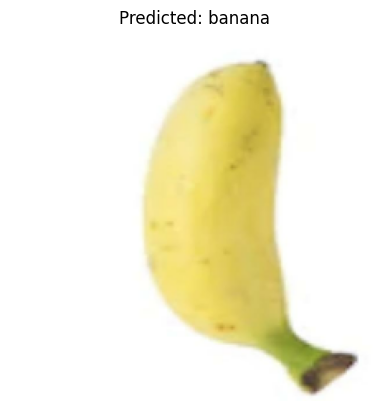

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


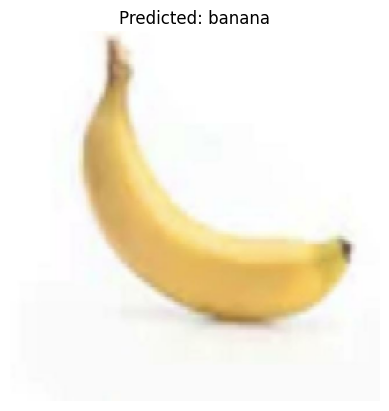

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


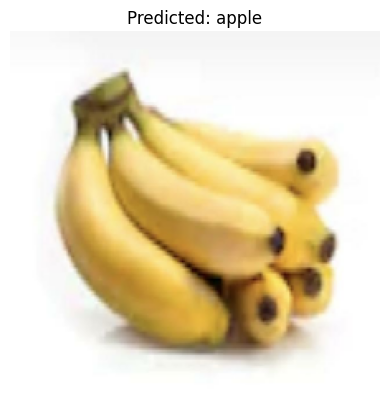

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


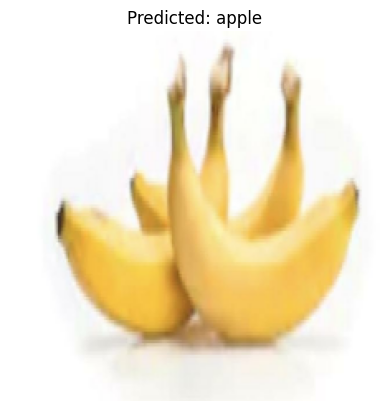

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


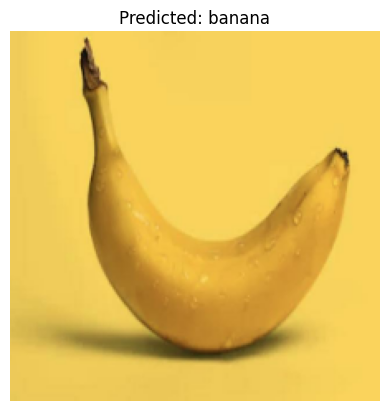

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

# Image size
img_height = 224
img_width = 224

# Path to test images
base_dir = "/content/drive/MyDrive/ScienceFair"
test_dir = pathlib.Path(base_dir) / 'test'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1,
    shuffle=False  # Ensures consistent order
)

# Function to show image and prediction
def show_predictions(model, test_ds):
    class_names = test_ds.class_names

    for images, _ in test_ds:
        prediction = model.predict(images)
        predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

        plt.imshow(images[0].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[predicted_class]}")
        plt.axis("off")
        plt.show()

# Example usage for one model (repeat for others)
print("Low Model Predictions:\n")
show_predictions(model_low, test_ds)

# To test the other models, use:
# show_predictions(model_mid, test_ds)
# show_predictions(model_high, test_ds)

Found 40 files belonging to 2 classes.

🔍 Low Results:
Accuracy: 45.00%
Correct Predictions: 18
Wrong Predictions: 22
Average Prediction Time: 0.1195s


🔍 Mid Results:
Accuracy: 87.50%
Correct Predictions: 35
Wrong Predictions: 5
Average Prediction Time: 0.1696s


🔍 High Results:
Accuracy: 87.50%
Correct Predictions: 35
Wrong Predictions: 5
Average Prediction Time: 0.1448s

✅ CSV file saved to: /content/All_Model_Results.csv


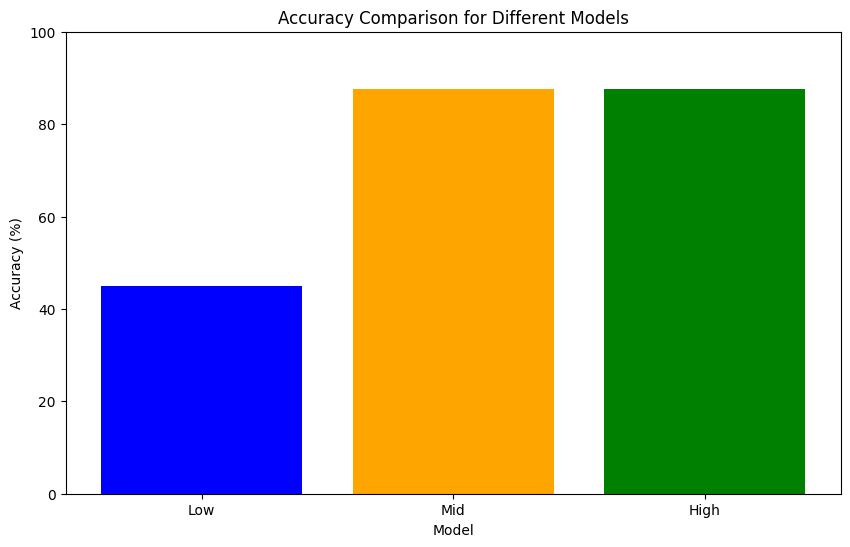

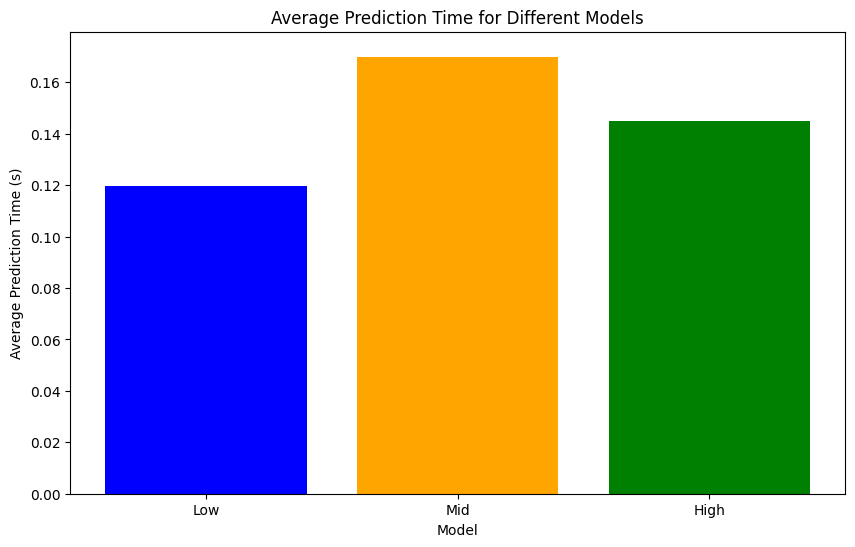

In [ ]:
import time
import pathlib
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Image size
img_height = 224
img_width = 224

# Test image path
base_dir = "/content/drive/MyDrive/ScienceFair"
test_dir = pathlib.Path(base_dir) / 'test'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1  # Evaluate one image at a time
)

# Function to evaluate a model and store detailed results
def evaluate_model(model, model_name, test_ds):
    results = []
    image_num = 0
    correct_predictions = 0
    total_time = 0

    for images, labels in test_ds:
        image_num += 1
        start_time = time.time()
        predictions = model.predict(images, verbose=0)
        end_time = time.time()

        predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
        actual_class = labels.numpy()[0]
        prediction_time = end_time - start_time
        correct = int(predicted_class == actual_class)

        results.append({
            "Model": model_name,
            "Image Number": image_num,
            "Predicted Class": predicted_class,
            "Actual Class": actual_class,
            "Correct": "Yes" if correct else "No",
            "Prediction Time (s)": round(prediction_time, 4)
        })

        total_time += prediction_time
        correct_predictions += correct

    accuracy = correct_predictions / image_num * 100
    avg_time = total_time / image_num

    print(f"\n🔍 {model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Wrong Predictions: {image_num - correct_predictions}")
    print(f"Average Prediction Time: {avg_time:.4f}s\n")

    return results, accuracy

# Run evaluations
results_low, accuracy_low = evaluate_model(model_low, "Low", test_ds)
results_mid, accuracy_mid = evaluate_model(model_mid, "Mid", test_ds)
results_high, accuracy_high = evaluate_model(model_high, "High", test_ds)

# Combine all results into a single DataFrame
df_all = pd.DataFrame(results_low + results_mid + results_high)

# Display a preview
df_all.head()

# Export to CSV so you can download it and use in Google Sheets
output_path = "/content/All_Model_Results.csv"
df_all.to_csv(output_path, index=False)
print(f"✅ CSV file saved to: {output_path}")

# Create a bar chart to visualize accuracy for each model
models = ['Low', 'Mid', 'High']
accuracies = [accuracy_low, accuracy_mid, accuracy_high]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison for Different Models')
plt.ylim(0, 100)
plt.show()

# You can also create additional charts for other comparisons (e.g., prediction time per model)
prediction_times = [df_all[df_all["Model"] == "Low"]["Prediction Time (s)"].mean(),
                    df_all[df_all["Model"] == "Mid"]["Prediction Time (s)"].mean(),
                    df_all[df_all["Model"] == "High"]["Prediction Time (s)"].mean()]

plt.figure(figsize=(10,6))
plt.bar(models, prediction_times, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Average Prediction Time (s)')
plt.title('Average Prediction Time for Different Models')
plt.ylim(0, max(prediction_times) + 0.01)
plt.show()